Exploratory Data Analysis (EDA) of Supermarket Sales Datasets in Python

The growth of supermarket in the most populated cities in Asia are increasing. The project aims to analyze supermarket sales across different branches and provide insight to understand the customer better. The dataset was taken from Kaggle.

Project Outline

1. Install and import the required libraries

2. Loading the Dataset

3. Perform Exploratory Analysis and Visualisation

4. Ask & Answer Questions about the Data

We will consider the supermarket sales data from the Kaggle dataset.

 The dataset and variables table:

The dataset consists of historical sales data of a supermarket company from 3 different branches over 3 months from Jan-March 2019. Following table provides a summary of the variables and the variable description.

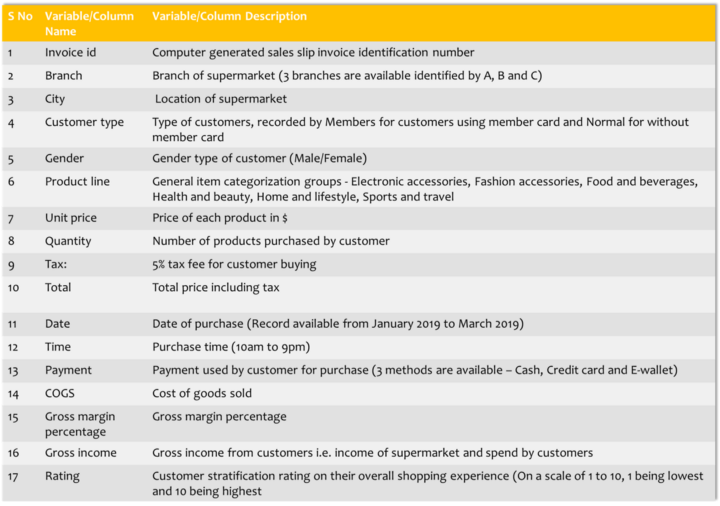

Import the libraries 

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Loading Data

In [2]:
df = pd.read_csv('c:/datasets/supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.shape

(1000, 17)

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
# modified_df=df.copy()

# Convert date columns into date time 
df.Date = pd.to_datetime(df.Date)
#Add a month,day and weekday columns
df['month']=df.Date.dt.month
df['day']=df.Date.dt.day
df['weekday']=df.Date.dt.day_name()
#Add a hour and minute columns 
df['hour']=df.Time.str[0:2]
df['minute']=df.Time.str[3:5]
#Make it int values
df['hour']=pd.to_numeric(df['hour'])
df['minute']=pd.to_numeric(df['minute'])


Checking information of data set.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
month                      0
day                        0
weekday                    0
hour                       0
minute                     0
dtype: int64

There are no missing value and the data set is clean so we will continue with data visualization.

Visualization

Now we use different visualization tools to check different aspects of Supermarket sales.

City

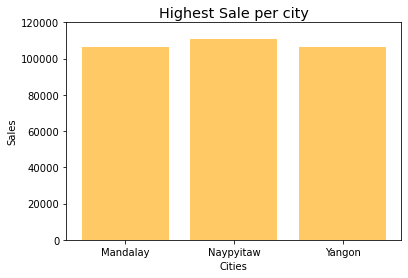

In [8]:
#Parameter for plotting 
sale=df.groupby('City').sum()['Total'] #Y-values
cities=[city for city, df in df.groupby('City')] #X-values

# Plot
plt.bar(cities,sale,color='orange',alpha=.6)
plt.style.use('classic')
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.title('Highest Sale per city')
plt.show()

Naypitaw has the highest number of sales, however, Mandalay and Yangon are not too far from Naypitaw.

Month

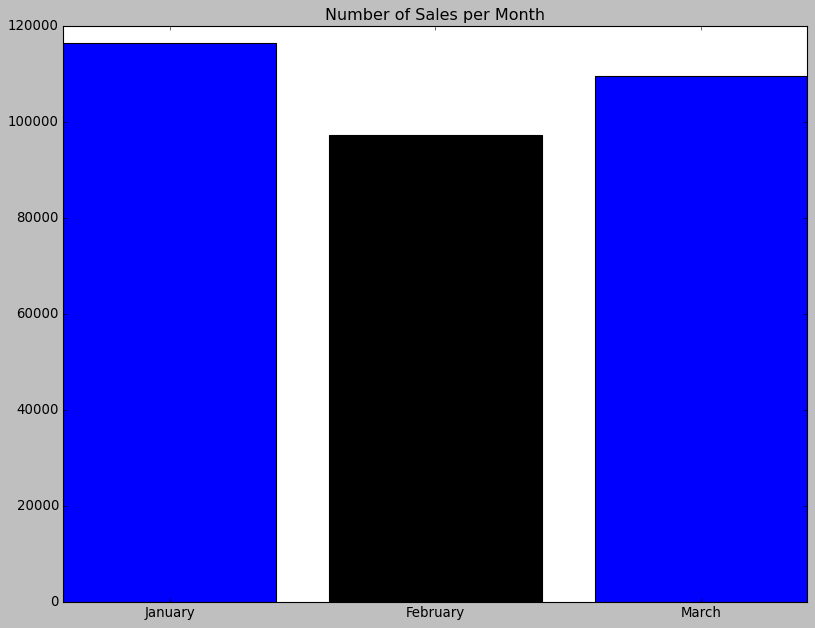

In [9]:
#Parameters for plotting 
sale=df.groupby('month').sum()['Total']
month=['January','February','March']
c=['b','k','b']
#Plot
plt.figure(figsize=(12,9))
plt.style.use('classic')
plt.bar(month,sale,color=c)
plt.title('Number of Sales per Month')
plt.show()
# print(sale)

The supermarket performs well in January. It has a decrease in transactions in February and bounces back in March

Quantity

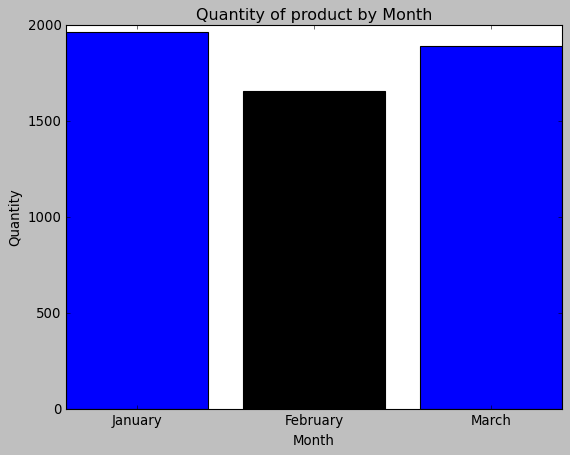

In [10]:
#Y-axis
quantity=df.groupby('month').sum()['Quantity']

#Plot
plt.title('Quantity of product by Month')
plt.style.use('classic')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.bar(month,quantity,color=c)
plt.show()

The quantity graph follows a similar pattern to the Sale graph. We have a correlation between the number of products and the number of items sold.

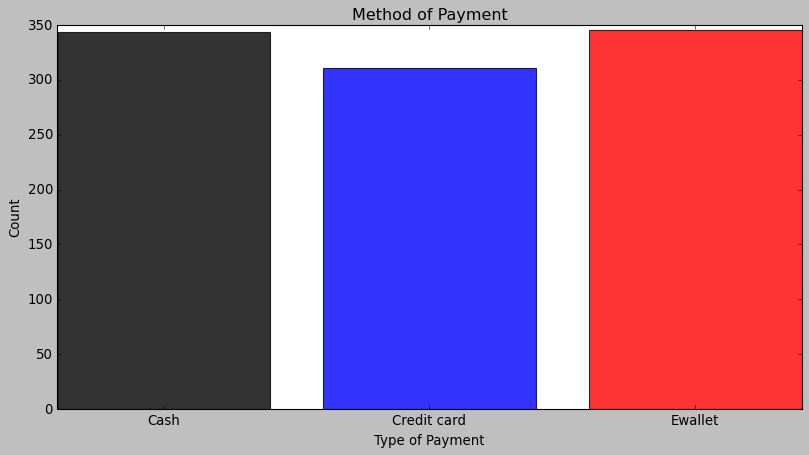

In [11]:
# Parameters for plotting
method=df.groupby('Payment').count()['Total']
payment=['Cash','Credit card','Ewallet']
c=['k','b','r']
# Plot 
plt.figure(figsize=(12,6))
plt.bar(payment,method,color=c,alpha=0.8)
plt.style.use('classic')
plt.xlabel('Type of Payment')
plt.ylabel('Count')
plt.title('Method of Payment')
plt.show()

Cash is mainly used by customers across the branches.

Payment method distribution in all branches

Text(0, 0.5, 'Peple Count')

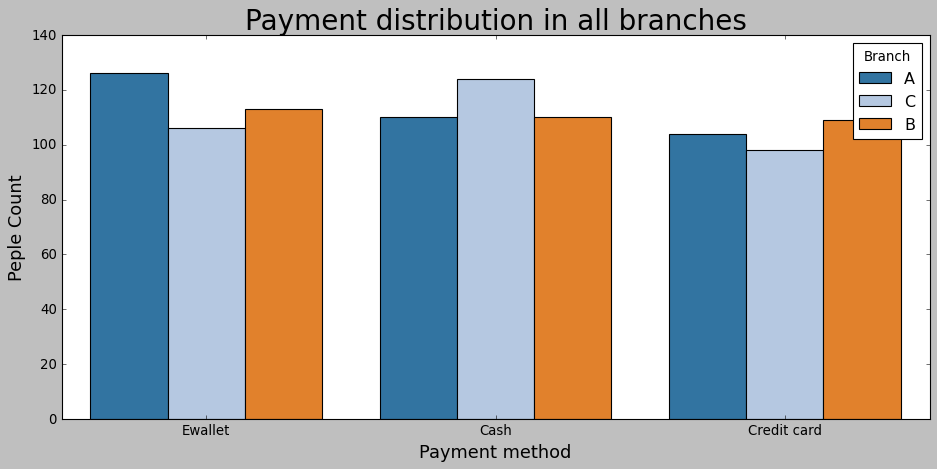

In [12]:
plt.figure(figsize = (14,6))
plt.style.use('classic')
ax = sns.countplot(x="Payment", hue = "Branch", data = df, palette= "tab20")
ax.set_title(label = "Payment distribution in all branches", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = "Peple Count", fontsize = 16)

Now let’s see the rating distribution in 3 branches

Text(0, 0.5, 'Rating distribution')

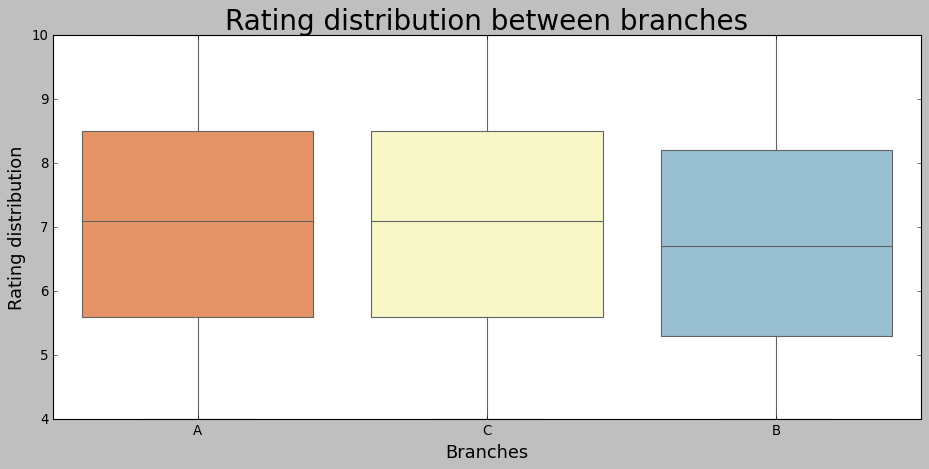

In [13]:
plt.figure(figsize=(14,6)) 
ax = sns.boxplot(x="Branch", y = "Rating" ,data =df, palette= "RdYlBu")
ax.set_title("Rating distribution between branches", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Rating distribution", fontsize = 16)

We can see that the average rating of branch A and C is more than seven and branch B is less than 7.

Hour

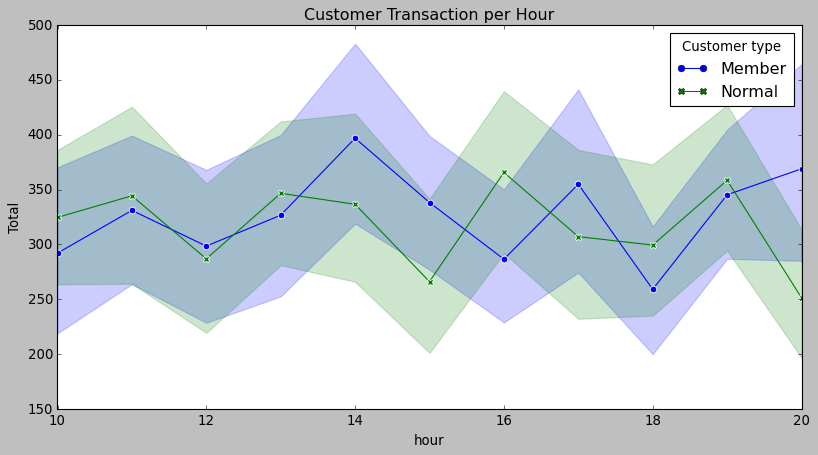

In [14]:
plt.figure(figsize=(12,6))
plt.title('Customer Transaction per Hour')
sns.lineplot(data=df,x='hour',y='Total',hue='Customer type',markers=True,style='Customer type',dashes=False); 

The Normal customers and the members like to shop around noon but members have the highest number of transactions at 2 pm.
Around 4 pm and 9 pm, the normal customers shop the most.


Max sales time

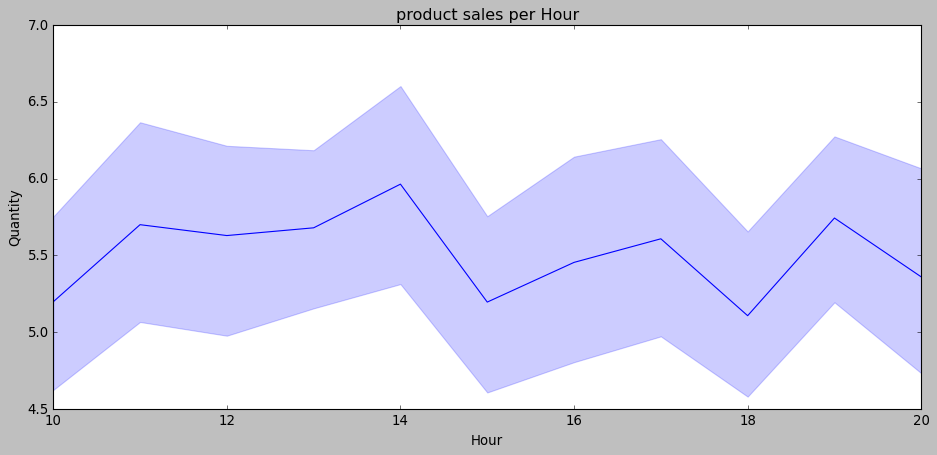

In [15]:
df["Time"]= pd.to_datetime(df["Time"])
df["Hour"]= (df["Time"]).dt.hour
plt.figure(figsize=(14,6))
plt.style.use('classic')
SalesTime = sns.lineplot(x="Hour", y ="Quantity", data = df).set_title("product sales per Hour")

We can see that the supermarket makes most of it’s sells in 14:00 hrs local time.

Using boxen plot

Text(0, 0.5, 'Product Line')

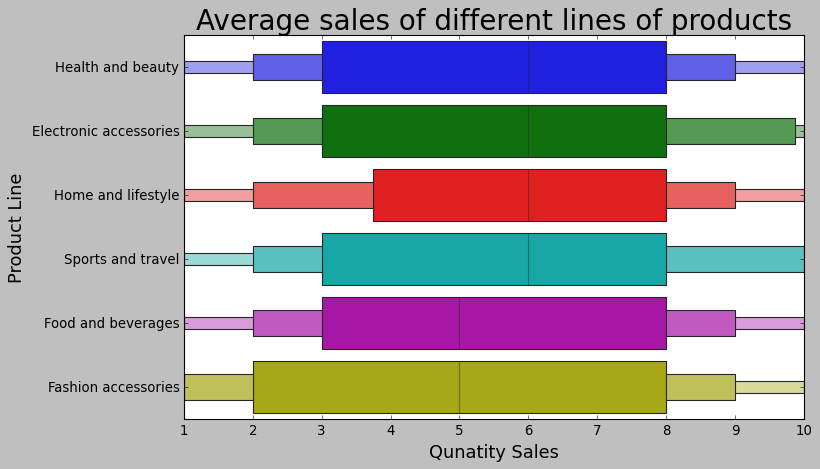

In [16]:
plt.figure(figsize=(10,6))
plt.style.use('classic')
ax = sns.boxenplot(x = "Quantity", y = "Product line", data = df,)
ax.set_title(label = "Average sales of different lines of products", fontsize = 25)
ax.set_xlabel(xlabel = "Qunatity Sales",fontsize = 16)
ax.set_ylabel(ylabel = "Product Line", fontsize = 16)

Here we can see that the average sales of different lines of products. Health and beauty making the highest sales whereas Fashon accessories making the lowest sales.

Correlation

In [17]:
#Create a correlation matrix
corr_df=df.corr()

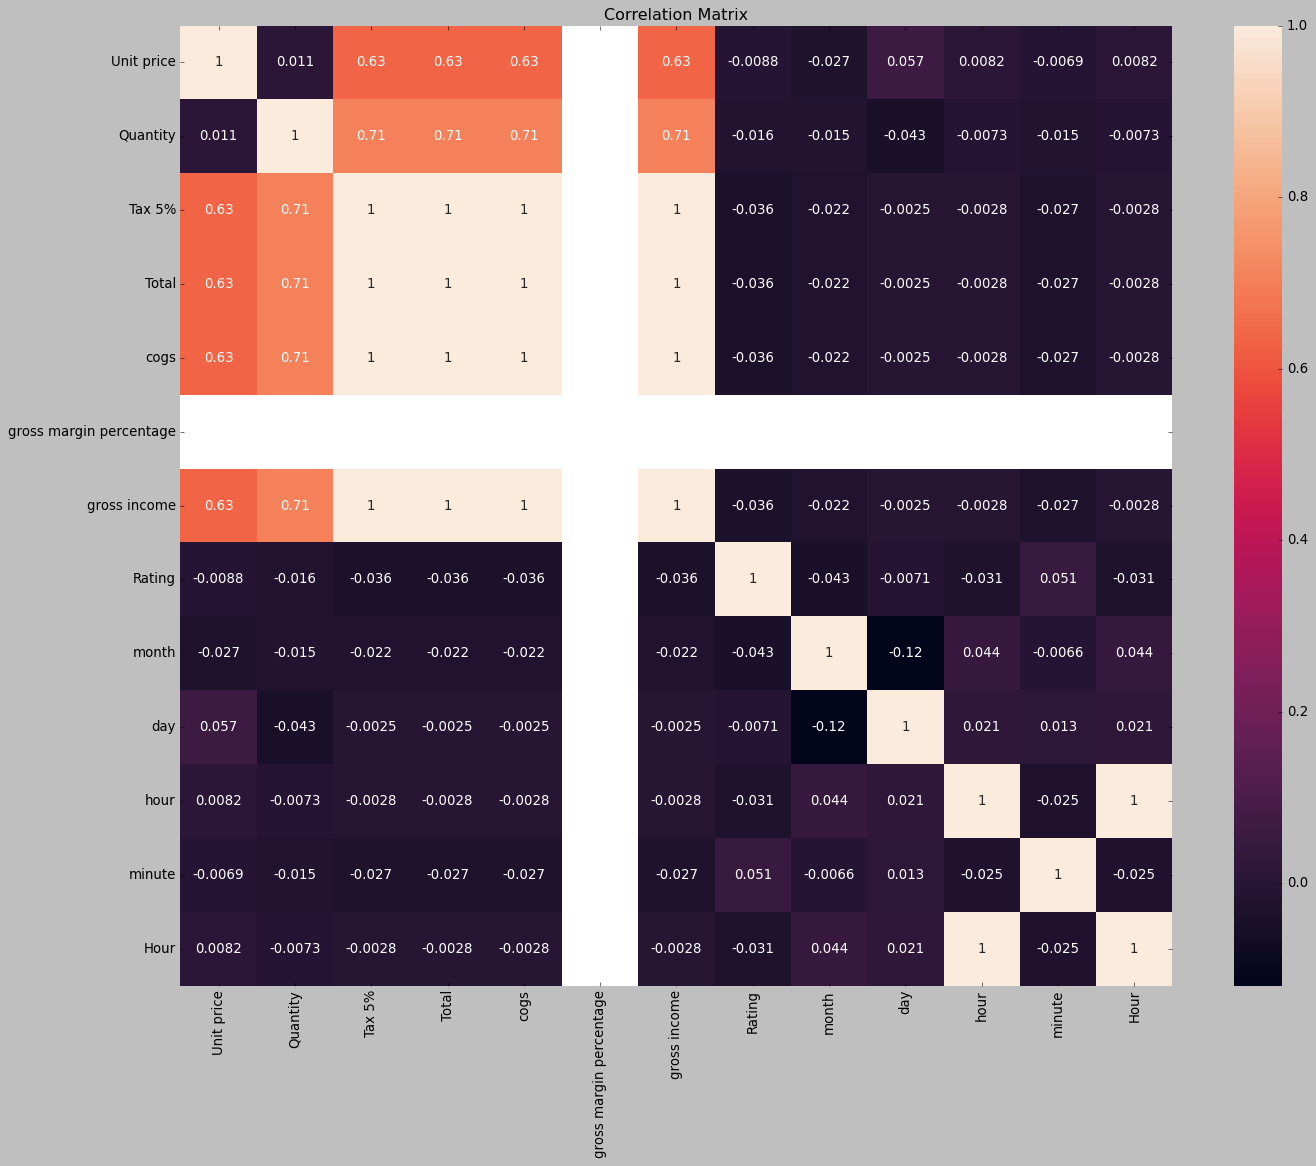

In [18]:
plt.figure(figsize=(20,15))
plt.title('Correlation Matrix')
sns.heatmap(corr_df,annot=True)
plt.show()

The black bars represent the null values (gross margin percentage vs gross margin percentage)

The purple represents almost no correlation between the columns

The orange block represents a high correlation between values. So taxes, Total, and cogs are highly correlated to quantity and unit price

The pale block represents the perfect correlation between values of the same columns.

After we get insight from the data, we could begin to ask some questions from those insights.

Question 1:  What was the total number of sales? What branch has the highest number of sales?

The lines of code below can be used to answer this:

In [19]:
sale_branch=df.groupby('Branch').sum()['Total']
print('Branch C has the highest number of sale of {}$'.format(max(sale_branch)))

Branch C has the highest number of sale of 110568.7065$


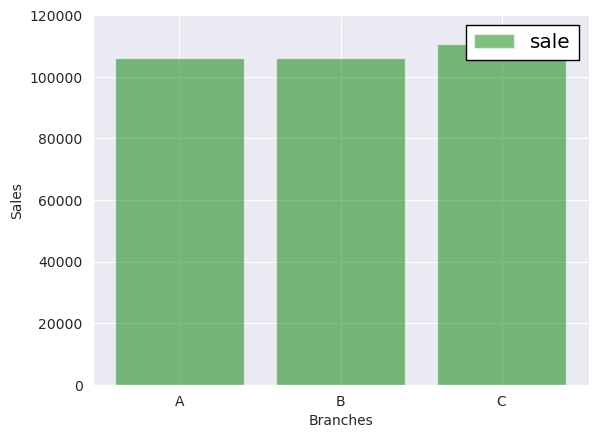

In [20]:
plt.style.use('default')
sns.set_style('darkgrid')
#Paramter for the x-axis
branches = [branch for branch, df in df.groupby('Branch')]
#Plot the graph

plt.bar(branches,sale_branch,alpha=0.5,color='g')
plt.style.use('classic')
plt.xlabel('Branches')
plt.ylabel('Sales')
plt.legend(['sale'])
plt.show()

Q2:What type of product is sold the most?

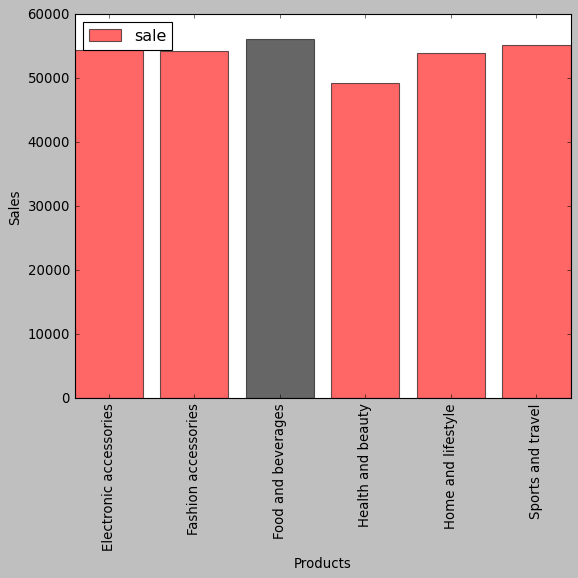

In [21]:
#Parameters
sale_product=df.groupby('Product line').sum()['Total']
products =[product for product, df in df.groupby('Product line')]
c=['r','r','k','r','r','r']
#Plot the graph

plt.bar(products,sale_product,alpha=0.6,color=c)
plt.xticks(products, rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Sales')
plt.legend(['sale'],loc='upper left')
plt.show()

Fashion accessories and food and beverages are the most sold product along with electronic accessories.

Q3: What gender buy more items in each category? what is the category?

In [22]:
df['male']=df['Gender'][df['Gender'] == 'Male']
df['female']=df['Gender'][df.Gender.str.contains('Female')]
product_gender=df.groupby('Product line').count()
product_gender
# male=product_gender['male']/product_gender['Total'].tolist()
df.drop(columns=['male','female'],inplace=True)

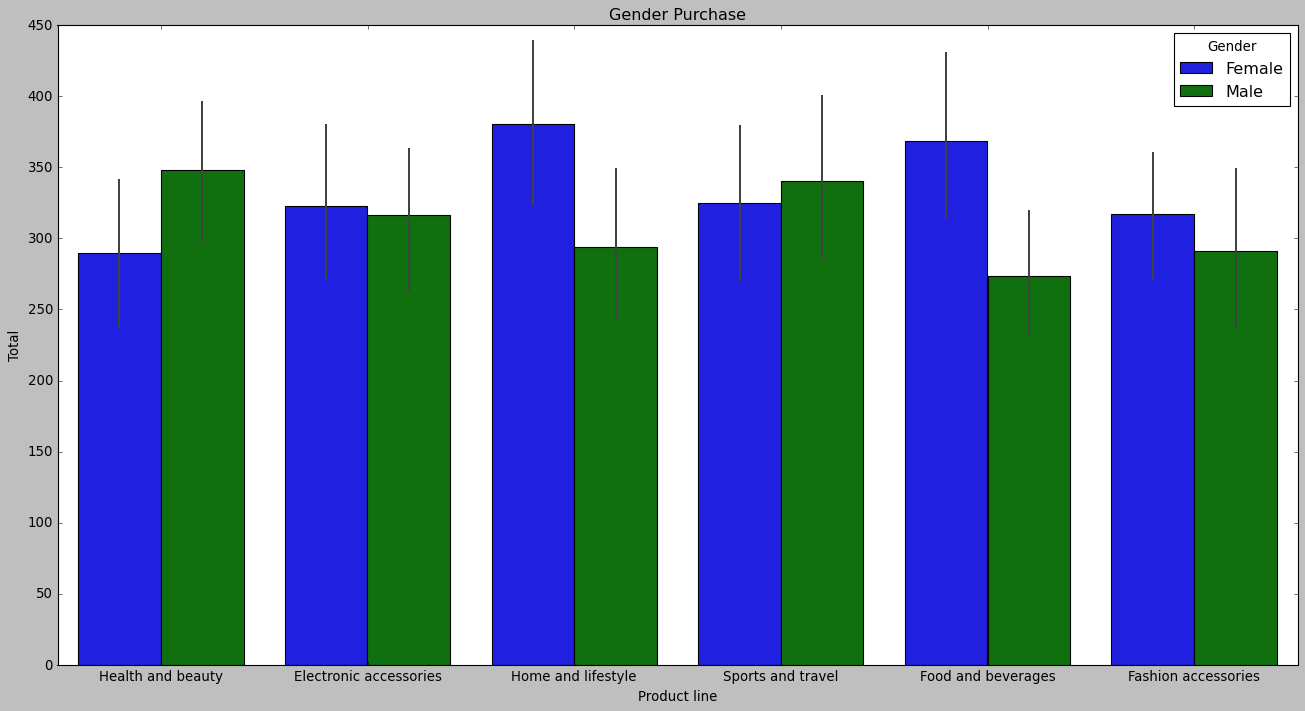

In [23]:
#Plot Gender purchase by product line
plt.figure(figsize=(20,10))
plt.title('Gender Purchase')
sns.barplot(x='Product line',y='Total',hue='Gender',data=df);

Men buy more products in 2 categories: Health and beauty: 350 men, Sports and travel: 330 men

Women buy more products in 4 categories: Home and lifestyle: 360 women, Food and beverages: 370 women, Fashion accessories: 320 women, Food and beverages: 90 women, Electronic accessories: 320 women almost equal to men.

Q4: How many people buy more than the average price in each category? Are they a member of the supermarket?

In [24]:
mean_sale=df['Total'].mean()
product_line=df['Product line'].unique()
print('The average sale of product is {:.3f}$'.format(mean_sale))

The average sale of product is 322.967$


In [25]:
people=[]
for product in product_line:
    p=df[(df['Total']>322.96) & (df['Product line'] == product)].count()['Total']
    people.append(p)
num_people=np.sum(people)

In [26]:
num_people

404

404 out of 1000 people buy more than the average price

Q5: Which is the most pouplar payment method used by customers?

Text(0, 0.5, 'Peple Count')

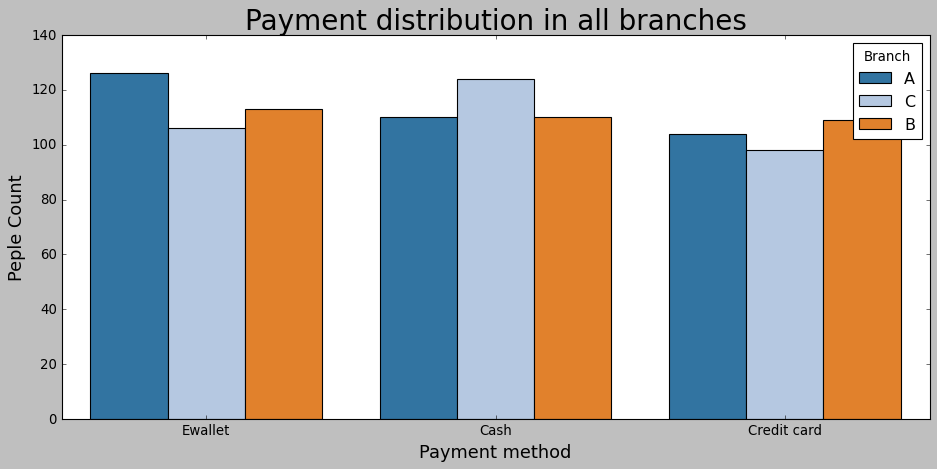

In [27]:
plt.figure(figsize = (14,6))
plt.style.use('classic')
ax = sns.countplot(x="Payment", hue = "Branch", data = df, palette= "tab20")
ax.set_title(label = "Payment distribution in all branches", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = "Peple Count", fontsize = 16)

Cash is mainly used by customers across the branches.

In [28]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

Text(0, 0.5, 'Sales')

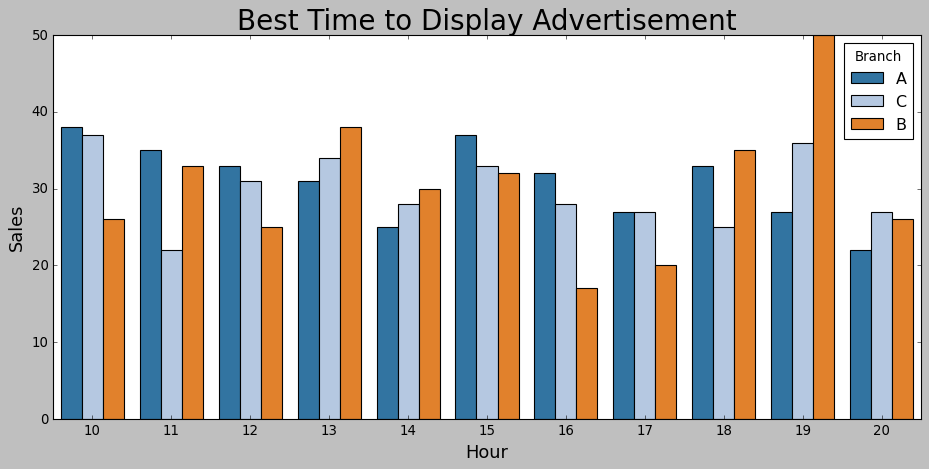

In [29]:
plt.figure(figsize = (14,6))
plt.style.use('classic')
ax = sns.countplot(x="Hour", hue = "Branch", data = df, palette= "tab20")
ax.set_title(label = "Best Time to Display Advertisement", fontsize= 25)
ax.set_xlabel(xlabel = "Hour", fontsize = 16)
ax.set_ylabel(ylabel = "Sales", fontsize = 16)

The favorite time to display advertisement are 13h and 19h. Branch B required more advertisement slots.

Q6: Which is the most popular payment method used by customers?

We can again do this using count plot as given below:

<AxesSubplot:xlabel='Payment', ylabel='count'>

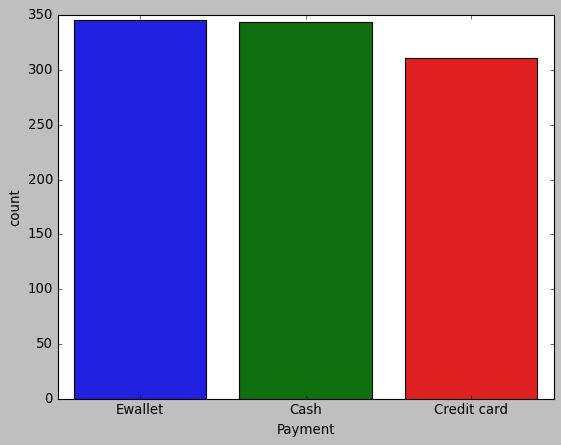

In [30]:
sns.countplot(df['Payment'])

 Most popular payment method (E wallet)

Ans: The most popular payment method is in-fact E-wallet and not credit cards.Cash payment is also popular.

Bi-variate analysis

Bivariate analysis is performed between two variables to look at their relationship. This bi-variate analysis that can help to draw important conclusions about the data.

Q7: Which branch is the most profitable?

We can use use the box plot given below for this.

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

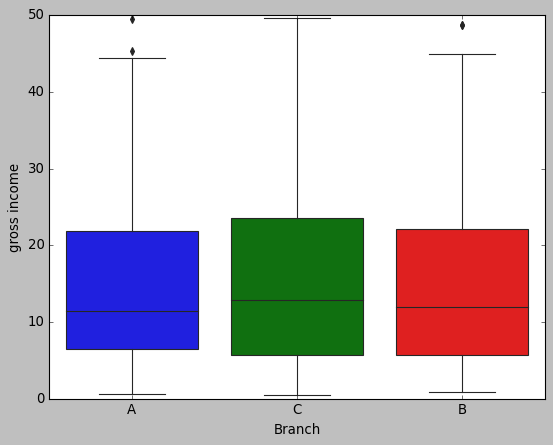

In [31]:
sns.boxplot(x=df['Branch'], y=df['gross income'])


 Gross income by branches

Ans: There is not much difference in gross income by branches at an average level. Branch C has a slightly higher income than A or B. As observed earlier,though branch A has slightly higher sales than the rest, C i.e. Naypyitaw is the most profitable branch in terms of gross income.

Q8: Is there any relationship between Gender and Gross income?

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

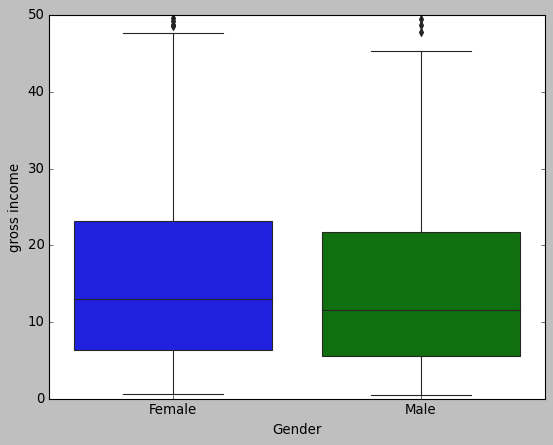

In [32]:
sns.boxplot(x=df['Gender'], y=df['gross income'])


Gross income by Gender 

Ans: Gross income is similar for both male and female, though female customers spend a bit higher at the 75th percentile.

Q9: What type of product is sold the most?

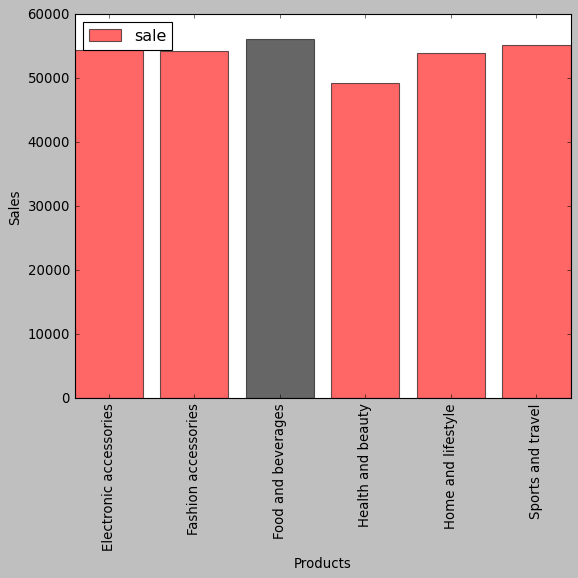

In [33]:
#Parameters
sale_product=df.groupby('Product line').sum()['Total']
products =[product for product, df in df.groupby('Product line')]
c=['r','r','k','r','r','r']
#Plot the graph

plt.bar(products,sale_product,alpha=0.6,color=c)
plt.xticks(products, rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Sales')
plt.legend(['sale'],loc='upper left')
plt.show()

The food and beverage category produces the most amount sales.

Q10: What is the spending pattern of females and males and in which category do they spend a lot?

We can also utilize the ‘hue’ option to get this information in one chart.

<AxesSubplot:title={'center':'Total Monthly transaction by Gender'}, xlabel='Product line', ylabel='count'>

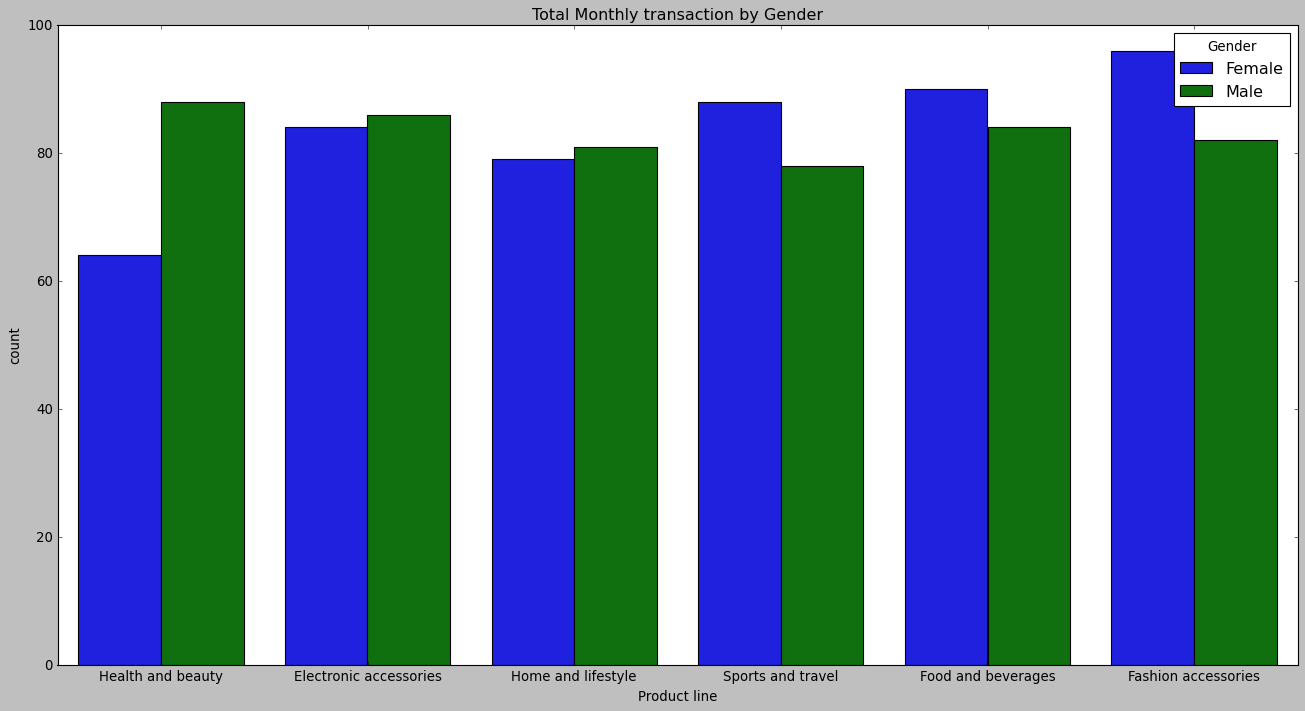

In [34]:
plt.figure(figsize=(20, 10))
plt.title('Total Monthly transaction by Gender')
sns.countplot(df['Product line'], hue = df.Gender)

 Spending pattern: Males vs Female

Ans: Females spend on 'fashion accessories' the most and for males it is 'Health and beauty'. Females also spend more on 'Sports and travel'

Q11: How many products are bought by customers?

Using distribution plot and heat map we can explore the number of products/quantities that most customers buy.

([<matplotlib.axis.XTick at 0x2021441d160>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

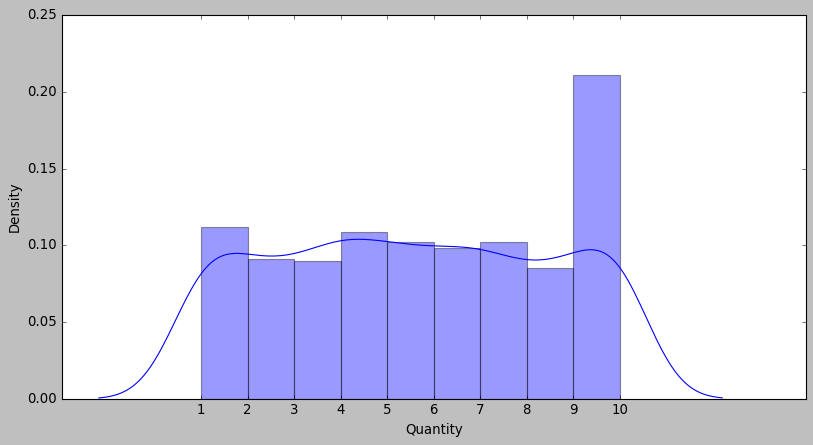

In [35]:
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.distplot(df['Quantity'])
plt.xticks(xdata)

Ans: Most of the customers buy 10 quantities.

Q12: Which day of the week has maximum sales?

Let us now explore if there is any particular day of the week when the sales is higher.

<AxesSubplot:title={'center':'Daily Sales by Day of the Week'}, xlabel='weekday', ylabel='count'>

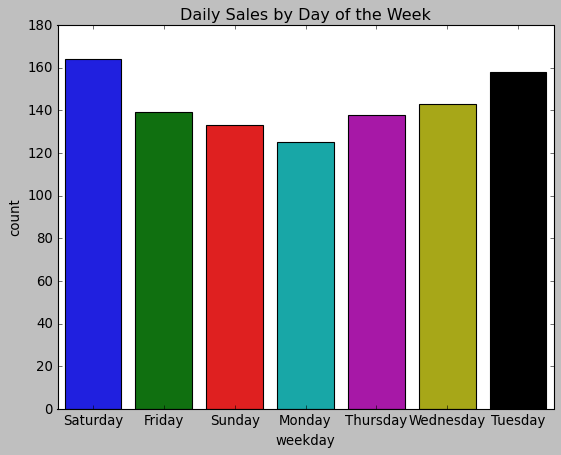

In [36]:
plt.figure(figsize=(8, 6))
plt.title('Daily Sales by Day of the Week')
sns.countplot(df['weekday'])

Ans: Sales is highest on Saturdays probably because it is the weekend. Interestingly,Tuesdays is a close second.Mondays is the lowest in sales, probably because it is start of the working week.

Q13: Which hour of the day is the busiest?

We need to extract the hour from the ‘Date’ variable to do this analysis. This can be done in the following way.

In [37]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

Text(0.5, 1.0, 'Product Sales per Hour')

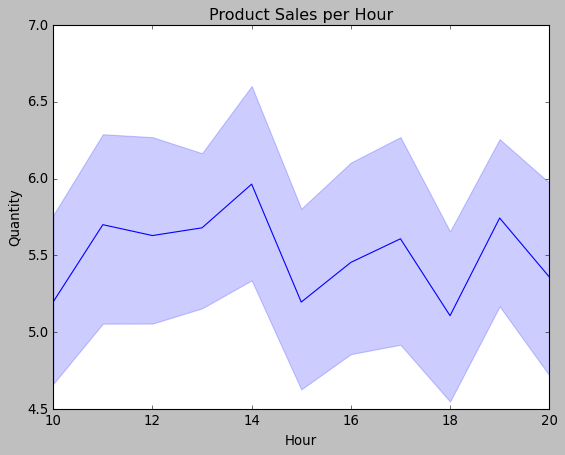

In [38]:
sns.lineplot(x="Hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour")

Observations

We have drawn many inferences from the data frame. Here is a summary of a few of them:

Branch C that is in Naypyitaw has the highest number of transactions and sales.

February has the lowest number of sales and January account for the most sales.

The quantity of products is well distributed across the board.

The food and beverage category produces the most amount sales.

Men purchase more products in 3 categories : Electronics, health and beauty, home and lifestyle.

Women purchase more products in 3 categories: Fashion, Food and beverages, and travel.

404 people out 1000 buy more than the average price. The sport and travel category has the most (75)people who buy more than the average price.

Cash is the favorite method of payment across customers. The member used a credit card and cash to complete the transaction. The normal customer prefers to use Ewallet and cash.

The favorite time to display advertisement is before 13h and 19h